In [1]:
#pip install opencv-python
#pip install tensorflow_hub
#pip install cv2
# pip install pillow


In [2]:
import numpy as np
import cv2

from PIL import Image
#import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential 

In [3]:
#importing from TF imagenet classifier model 

#https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub

mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
classifier_model = mobilenet_v2

IMAGE_SHAPE = (224, 224)


classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_model, input_shape=IMAGE_SHAPE+(3,))
])


In [4]:

# Load dataset 



dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it



228827136/228813984 [==============================] - 8s 0us/step


In [5]:
#check directory 
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir


PosixPath('datasets/flower_photos')

In [6]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/8681169825_19a21c6bf5_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/19438516548_bbaf350664.jpg'),
 PosixPath('datasets/flower_photos/dandelion/18232119726_cef27eaaac_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/15549402199_2890918ddb.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2938040169_eb38581359.jpg')]

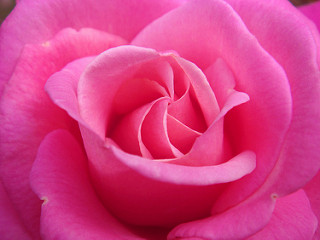

In [7]:
#globe iterates over subtree and fetches all data under it 
roses = list(data_dir.glob('roses/*')) 
Image.open(str(roses[3]))


In [8]:

flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}



In [9]:
flowes_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    "sunflowers":3,
    'tulips':4
}

In [10]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/9164900485_605aa12da8.jpg'),
 PosixPath('datasets/flower_photos/roses/2535466393_6556afeb2f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/229488796_21ac6ee16d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3667366832_7a8017c528_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6108118824_5b0231a56d.jpg')]

In [11]:
#Now we'll resize all the images to standard shape

img= cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(333, 500, 3)

In [12]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [13]:
X,y=[],[]

for flower_name,images in flowers_images_dict.items():
     for i in images : 
         img= cv2.imread(str(i))
         resized_img = cv2.resize(img,(224,224))
         X.append(resized_img)
         y.append(flower_name) 

daisy


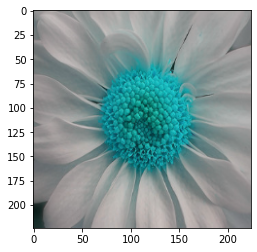

In [14]:

plt.imshow(X[909])
print(y[909])

In [15]:
X= np.array(X)
y= np.array(y)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# drop some data if using cpu
#X_train= X_train[:2000]
#y_train= y_train[:2000]
#X_test= X_test[:500]
#y_test= y_test[:500]


In [22]:
#scaling the images 

X_train_scaled = X_train/ 255



In [23]:
X_test_scaled = X_test/ 255


In [19]:
#Loading the pretrained model without top layer

feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer= hub.KerasLayer(
    feature_extractor_model,input_shape=(224,224,3)
)


In [20]:
num_of_flowers = 5 

model = tf.keras.Sequential([
      pretrained_model_without_top_layer,
      tf.keras.layers.Dense(num_of_flowers)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [24]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)



Epoch 1/5


UnimplementedError: ignored

In [25]:
model.evaluate(X_test_scaled,y_test)

UnimplementedError: ignored